# Detectando Doença de Parkinson
## Uma Comparação de Modelos de Aprendizagem de Máquina

---


## Problemática
O atual cenário político-social mundial tem se mostrado fortemente impactado pela **disseminação de Fake News**, as quais vem ganhando bastante **notoriedade com o crescente uso de redes sociais** e divulgação das mesmas nesses meios.

Visto que as fakes news **acabam servindo como um meio de alienar a população**, o presente notebook possui o objetivo de **elaborar um modelo que possa classificar se determinada notícia é verdadeira ou falsa**, consistindo **ao todo em 4009 registros de notícias**, sendo 2137 notícias falsas e 1872 notícias verdadeiras.

Aqui utilizaremos os seguintes algoritmos de aprendizagem de máquina para elaboração do nosso modelo:
> - Regressão Logística
> - KNN
> - Análise Discriminante Gaussiano
> - Árvore de Decisão
> - SVM
> - Random Forest
> - Processo Gaussiano


## Fonte dos Dados
O dataset utilizado para este problema foi retirado do [Kaggle]( https://www.kaggle.com/jruvika/fake-news-detection), fruto de um web crawler de diferentes fontes americanas, consiste em **4009 registros de notícias**, sendo **2137 notícias falsas** e **1872 notícias verdadeiras**.

## Sumário
#### 1. Importações
#### 2. Leitura dos Dados
#### 3. Redução de Dimensionalidade dos Dados
#### 4. Visualização dos Dados
#### 5. Avaliação dos Modelos

# 1. Importações

In [1]:
import numpy as np
import pandas as pd
import warnings
import random
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean
from math import log, pi, sqrt
%matplotlib inline

from scipy.linalg import svd 
from sklearn import linear_model, datasets, svm, metrics
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared
from modelos import distance_euclidian, distance_manhattan, fitAD, fitAGD, fitRF, fitRL, fitSVM, predict1AGD, predict1KNN, predictAD, predictAGD, predictKNN, predictRF, predictRL, predictSVM, sigmoide, fitGP, predictGP, train_testSplit 
warnings.filterwarnings("ignore")
np.random.seed(12345)

In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

# 2. Leitura dos Dados

In [2]:
dataset = pd.read_csv("data.csv")
header = dataset.loc[0]
dataset = dataset.drop([0])
dataset.columns = header
dataset.index = range(0, dataset.shape[0])
for col in dataset.columns:
    dataset[col] = dataset[col].astype(float)
data = dataset
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.0,1.0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1.0
1,0.0,1.0,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1.0
2,0.0,1.0,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1.0
3,1.0,0.0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1.0
4,1.0,0.0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1.0


# 3. Redução da Dimensionalidade

In [3]:
def fisher_score(x, y):
    mean = np.mean(x, axis=0)
    classes = np.unique(y)
    sS = 0
    sD = 0
    Nk = []
    
    meanD = []
    varD = []
    
    for k in classes:
        elements = []
        s = 0
        for i in range(0, len(y)):
            if(y[i] == k):
                s += 1
                elements.append(x[i])
        meanD.append(np.mean(elements, axis=0))
        varD.append(np.var(elements, axis=0))
        Nk.append(s)
    
    for k in range(0, len(classes)):
        sS += (Nk[k] * ((meanD[k] - mean)**2))
        sD += (Nk[k] * varD[k])
    return sS/sD

def compute(x):
    mean = np.mean(x, axis = 0)
    cov = np.cov(np.transpose(x))

    U, S, V = svd(cov)
    S = np.diag(S)
    M = U @ S @ V
    P = np.transpose(U)
    return {'S': S, 'U': U, 'V': V, 'M': M, 'P': P}

def transform(x, rateVariance):
    pca_result = compute(x)
    
    S = pca_result['S']
    P = pca_result['P']
    
    matrizTransform = []
    varianciaExplicadaTot = 0
    varianceExpl = 0
    autoValores = []
    for i in range(0, S.shape[0]):
        varianciaExplicadaTot += S[i,i]
        autoValores.append(S[i,i])
    varianceExpl = rateVariance *varianciaExplicadaTot

    autoValOrdenados = np.sort(autoValores)
    autoValOrdenados = autoValOrdenados[::-1]
    
    varianceAtual = 0
    i = 0
    while(varianceAtual<=varianceExpl and i<autoValOrdenados.shape[0]):
        for j in range (0, len(autoValores)):
            if(autoValOrdenados[i]==autoValores[j]):
                matrizTransform.append(P[j])
        varianceAtual += autoValOrdenados[i]
        i += 1
    return {'P': matrizTransform, 'Z':np.transpose(np.dot(matrizTransform, np.transpose(x)))}

In [6]:
resultPCA = transform(df.values[:,0:-1], 0.9)

In [7]:
dataPCA = np.hstack((resultPCA['Z'], df.values[:,-1][:,None]))
matrizPCA = resultPCA['P']

In [8]:
fisher_scores = fisher_score(dataPCA[:,0:-1], dataPCA[:,-1])
qnt = 1000
indices = []
for i in range(qnt):
    indice = np.argmin(fisher_scores)
    fisher_scores[indice] = 10000
    indices.append(indice)

dataPCA = pd.DataFrame(dataPCA)
data_fisher = dataPCA.drop([dataPCA.columns[i] for i in indices] ,  axis='columns')
data_fisher.head()

,0,1,2,3,4,5,6,9,10,11,...,1381,1384,1385,1387,1388,1392,1395,1416,1442,1444
0,0.025691,-0.024908,-0.033537,-0.035607,-0.019997,0.013177,-0.043957,0.347849,0.115946,0.209061,...,0.010632,0.004750,0.020063,-0.040748,-0.002611,0.002127,-0.027562,-0.032200,0.004276,1.0
1,-0.027007,-0.010446,-0.018248,0.002833,-0.020734,0.010253,-0.005491,0.087276,0.024949,-0.015851,...,-0.031263,0.000018,-0.019607,-0.026758,-0.034573,0.052115,-0.019433,0.073518,0.008729,1.0
2,-0.030487,-0.036349,-0.050329,0.012338,-0.020423,-0.060544,-0.003565,0.513526,0.174092,0.247470,...,0.011423,-0.075074,-0.012292,-0.015024,-0.014462,0.004926,0.042514,0.069674,-0.024868,1.0
3,0.748007,0.052074,0.001560,0.219574,-0.554931,-0.049215,0.136267,-0.171225,0.225117,0.102913,...,-0.059506,0.062238,-0.005216,-0.020181,0.015555,-0.027637,0.031870,0.045878,-0.010686,1.0
4,-0.017514,-0.019153,-0.030974,0.002870,-0.008999,-0.039631,0.032425,-0.058960,0.003066,-0.023773,...,0.005979,0.010940,-0.011959,0.008695,-0.004352,0.014467,0.014946,0.001122,0.005700,1.0


# 6. Avaliação de Métodos

In [3]:
ids = data['id'].unique()
x_train, x_test, y_train, y_test = train_testSplit(ids, data, 0.25)

In [4]:
def acc(y_test, results):
    tot = [1 for x,z in zip(y_test,results) if x == z]
    return (np.sum(np.array(tot))/len(y_test))*100

## 6.1 Regressão Logística

In [5]:
y_predRL = predictRL(fitRL(x_train, y_train, 10000, 0.001, 0.1)[0], x_test)
print("[Regressão Logística] Score")
acc(y_test, y_predRL)

[Regressão Logística] Treinando modelo...
[Regressão Logística] Testando modelo...
[Regressão Logística] Score


74.60317460317461

In [6]:
print(classification_report(y_test, y_predRL))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.75      1.00      0.85       141

    accuracy                           0.75       189
   macro avg       0.37      0.50      0.43       189
weighted avg       0.56      0.75      0.64       189



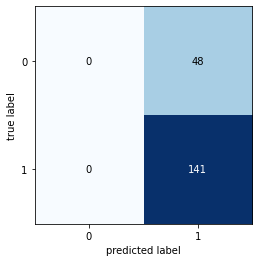

In [7]:
cm = confusion_matrix(y_test, y_predRL)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('RegLog.png')
plt.show()

## 6.2. Análise Discriminante Gaussiano

In [8]:
y_predAGD = predictAGD(fitAGD(x_train, y_train), x_test)
print("[Análise Discriminante Gaussiano] Score")
acc(y_test, y_predAGD)

[Análise Discriminante Gaussiano] Treinando modelo...
[Análise Discriminante Gaussiano] Testando modelo...
[Análise Discriminante Gaussiano] Score


25.396825396825395

In [9]:
print(classification_report(y_test, y_predAGD))

              precision    recall  f1-score   support

         0.0       0.25      1.00      0.41        48
         1.0       0.00      0.00      0.00       141

    accuracy                           0.25       189
   macro avg       0.13      0.50      0.20       189
weighted avg       0.06      0.25      0.10       189



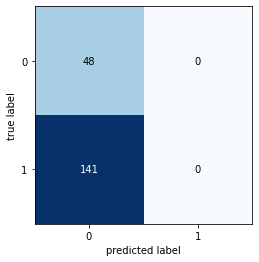

In [10]:
cm = confusion_matrix(y_test, y_predAGD)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('AGD.png')
plt.show()

## 6.3. Árvore de Decisão

In [11]:
y_predAD = predictAD(fitAD(x_train, y_train, 'gini', 3), x_train, y_train, x_test)
print("[Árvore de Decisão] Score")
acc(y_test, y_predAD)

[Árvore de Decisão] Selecionando hiperparâmetros...
[Árvore de Decisão] Treinando modelo...
[Árvore de Decisão] Hiperparâmetros escolhidos para Árvore de Decisão:  {'criterion': 'entropy', 'max_depth': 3}
[Árvore de Decisão] Testando modelo...
[Árvore de Decisão] Score


77.24867724867724

In [12]:
print(classification_report(y_test, y_predAD))

              precision    recall  f1-score   support

         0.0       0.61      0.29      0.39        48
         1.0       0.80      0.94      0.86       141

    accuracy                           0.77       189
   macro avg       0.70      0.61      0.63       189
weighted avg       0.75      0.77      0.74       189



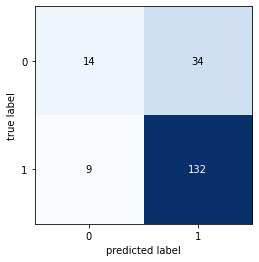

In [13]:
cm = confusion_matrix(y_test, y_predAD)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('AD.png')
plt.show()

## 6.4. SVM

In [ ]:
y_predSVM = predictSVM(fitSVM(x_train, y_train), x_train, y_train, x_test)
print("[SVM] Score")
acc(y_test,y_predSVM)

[SVM] Selecionando hiperparâmetros...
[SVM] Treinando modelo...


In [ ]:
print(classification_report(y_test, y_predSVM))

In [ ]:
cm = confusion_matrix(y_test, y_predSVM)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('SVM.png')
plt.show()

## 6.5. Random Forest

In [ ]:
y_predRF = predictRF(fitRF(x_train, y_train), x_train, y_train, x_test)
acc(y_test, y_predRF)

In [ ]:
print(classification_report(y_test, y_predRF))

In [ ]:
cm = confusion_matrix(y_test, y_predRF)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('RF.png')
plt.show()

## 6.6. KNN

In [ ]:
y_predKNN = predictKNN(x_train, y_train, x_test, distance_euclidian)
print(acc(y_test, y_predKNN))

In [ ]:
cm = confusion_matrix(y_test, y_predKNN)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('KNN.png')
plt.show()

## 6.7. Processo Gaussiano

In [ ]:
y_predGP = predictGP(fitGP(x_train, y_train), x_train, y_train, x_test)
print(acc(y_test, y_predGP))

In [ ]:
cm = confusion_matrix(y_test, y_predGP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('GP.png')
plt.show()